In [1]:
# install dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import emcee

import matplotlib.pyplot as plt
import numpy as np
import os, sys, shutil
import pandas as pd
import sklearn.metrics as slm

pkdir = "/pscratch/sd/s/sbrisin/cibcmass/hmvec"
sys.path.insert(0,pkdir)

#import hmvec as hm
from hmvec import hmvec as hm 
from scipy.interpolate import interp1d

.4 - .5

In [22]:
# data prep

data = pd.read_csv("crosses.csv")
cii = data['ciib']
cgg = data['cggb']
err = data['err']
cig = data['cl']
l =  data['l']
z = data['z']
err = err[z == '.4-.5']
cii = cii[z == '.4-.5']
cgg = cgg[z == '.4-.5']
cig = cig[z == '.4-.5']
l = l[z == '.4-.5']

In [44]:
cib_freq = 545 * 1e9

zs = np.linspace(0.4,.5,20)
ms = np.geomspace(1e10,1e17,200)
ks = np.geomspace(1e-4,100,1001)
hcos = hm.HaloModel(zs,ks,ms=ms)
hcos.set_cibParams('vierro')

hcos.add_hod(name="CMASS",mthresh=10**12+zs*0.)
ells = np.linspace(300,1000,5)


/pscratch/sd/s/sbrisin/cibcmass/hmvec/hmvec/hmvec.py:994: RuntimeWarning: invalid value encountered in true_divide
  ret = Ns**2./Nc


In [45]:
# params from vierro
hcos.cib_params['alpha'] = 0.2
hcos.cib_params['beta'] = 1.6
hcos.cib_params['gamma'] = 1.7 # not in Viero, so using Planck13
hcos.cib_params['delta'] = 2.4
hcos.cib_params['Td_o'] = 20.7
#hcos.cib_params['logM_eff'] = logmeff # vqry n sre
hcos.cib_params['var'] = 0.3
#hcos.cib_params['L_o'] = lo # vary n see n plot w prob

In [13]:
hcos.set_cibParams('vierro')

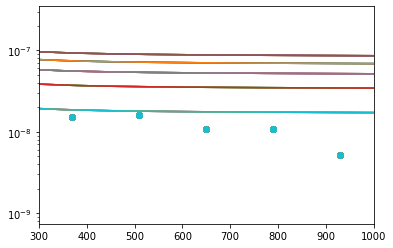

In [20]:
for i, lo in enumerate(np.linspace(1e-7,2e-8, 5)):
    hcos.cib_params['L_o'] = lo
    for i, lo in enumerate(np.linspace(10,15, 5)):
        hcos.cib_params['logM_eff'] = logmeff
        PgI_1h = hcos.get_power_1halo('CMASS', "cib", nu_obs=np.array([cib_freq])) # put this back in hertz
        PgI_2h = hcos.get_power_2halo('CMASS', 'cib',nu_obs=np.array([cib_freq])) # put this back in hertz
    # Project to 2D to get the Cls
        Cl_gI_1h = hcos.C_gI(ells, hcos.zs, hcos.ks, PgI_1h, gzs = zs, gdndz= np.ones_like(zs))
        Cl_gI_2h = hcos.C_gI(ells, hcos.zs, hcos.ks, PgI_2h, gzs = zs, gdndz= np.ones_like(zs))
    # Plot
        plt.plot((Cl_gI_1h + Cl_gI_2h)*1e-6/np.sqrt(4*np.pi), label='total', ls='-')
        plt.scatter(l,cig)
        plt.yscale('log')
        plt.xlim([300,1000])
    PgI_1h = hcos.get_power_1halo('CMASS', "cib", nu_obs=np.array([cib_freq])) # put this back in hertz
    PgI_2h = hcos.get_power_2halo('CMASS', 'cib',nu_obs=np.array([cib_freq])) # put this back in hertz
# Project to 2D to get the Cls
    Cl_gI_1h = hcos.C_gI(ells, hcos.zs, hcos.ks, PgI_1h, gzs = zs, gdndz= np.ones_like(zs))
    Cl_gI_2h = hcos.C_gI(ells, hcos.zs, hcos.ks, PgI_2h, gzs = zs, gdndz= np.ones_like(zs))
# Plot
    plt.plot((Cl_gI_1h + Cl_gI_2h)*1e-6/np.sqrt(4*np.pi), label='total', ls='-')
    plt.scatter(l,cig)
    plt.yscale('log')
    plt.xlim([300,1000])

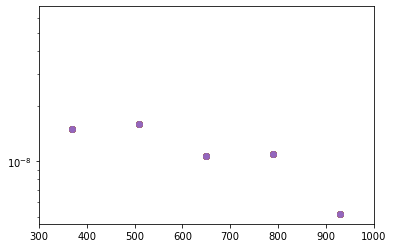

In [46]:
for i, lo in enumerate(np.linspace(10,15, 5)):
    hcos.cib_params['logM_eff'] = logmeff
    PgI_1h = hcos.get_power_1halo('CMASS', "cib", nu_obs=np.array([cib_freq])) # put this back in hertz
    PgI_2h = hcos.get_power_2halo('CMASS', 'cib',nu_obs=np.array([cib_freq])) # put this back in hertz
# Project to 2D to get the Cls
    Cl_gI_1h = hcos.C_gI(ells, hcos.zs, hcos.ks, PgI_1h, gzs = zs, gdndz= np.ones_like(zs))
    Cl_gI_2h = hcos.C_gI(ells, hcos.zs, hcos.ks, PgI_2h, gzs = zs, gdndz= np.ones_like(zs))
# Plot
    plt.plot((Cl_gI_1h + Cl_gI_2h)*1e-6/np.sqrt(4*np.pi), label='total', ls='-')
    plt.scatter(l,cig)
    plt.yscale('log')
    plt.xlim([300,1000])

In [47]:
# define true params
cig_t = cig

In [48]:
# define prior

def log_prob(params,x):
# here do the model stuff
    return 
    

In [49]:
#posteriors

In [50]:
#go to corner plot

In [51]:
# do this per redshift bin

In [52]:
# "true params" 

hcos.cib_params['alpha'] = 0.2
hcos.cib_params['beta'] = 1.6
hcos.cib_params['gamma'] = 1.7 # not in Viero, so using Planck13
hcos.cib_params['delta'] = 2.4
hcos.cib_params['Td_o'] = 20.7
lmeff_true = hcos.cib_params['logM_eff'] = 12.3 # vqry n sre
hcos.cib_params['var'] = 0.3
lo_true = hcos.cib_params['L_o'] = 2e-7 # vary n see n plot w prob

In [53]:
# data :D
cig = cig
l =  l 
err = err
f_true = 1